In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import sys
import csv
import numpy as np
from os.path import isfile
from matplotlib import ticker, gridspec
from matplotlib.dates import DateFormatter
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
from colorsys import hsv_to_rgb

In [13]:
my_path = '/Users/david/Dropbox/Computing/Linux/Python/fitzgap_data/'

#  data_file = 'fgap_data_financials.csv'
data_file = 'fitzGAP_Statements.csv'
data = pd.read_csv(my_path + data_file)
data.columns = ['Date','Month','Year','Fiscal_year_end','Description',
            'Category','Money_in','Money_Out','Balance','Month_Name','Rentee','Subcat','blank1','blank2','blank3']  # Converts Column headers to consistent labels

data = data[data['Date'].notna()]  # Drop rows without Date   
data = data.drop(['blank1','blank2','blank3'], axis=1)        

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, yearfirst=False)
data['month_year'] = pd.to_datetime(data['Date']).dt.to_period('M')
data.sort_values(by=['Date'], inplace=True, ascending=True)

In [ ]:
#data = data[data['Date']>'31-12-2017']
#data.reset_index(inplace=True)

In [14]:
data['Money_in'] = data['Money_in'].astype(str)
data['Money_Out'] = data['Money_Out'].astype(str)


data['Money_in'] = data['Money_in'].str.replace('£','')
data['Money_Out'] = data['Money_Out'].str.replace('£','')

data['Money_in'] = data['Money_in'].str.replace('nan','')
data['Money_Out'] = data['Money_Out'].str.replace('nan','')

data['Money_in'] = data['Money_in'].str.replace(',','')
data['Money_Out'] = data['Money_Out'].str.replace(',','')

data['Money_in'] = data['Money_in'].str.replace('(','-')
data['Money_Out'] = data['Money_Out'].str.replace('(','-')

data['Money_in'] = data['Money_in'].str.replace(')','')
data['Money_Out'] = data['Money_Out'].str.replace(')','')

data['Money_in'] = data['Money_in'].str.strip()
data['Money_Out'] = data['Money_Out'].str.strip()

#print(data.head())

data['Money_in'].fillna("", inplace=True)
data['Money_Out'].fillna("", inplace=True)
#print(data.head())

data['Money_in'] = pd.to_numeric(data['Money_in'])
data['Money_Out'] = pd.to_numeric(data['Money_Out'])


data = data.set_index('Date')
data.sort_values(by = ['Date'], inplace=True, ascending=True)

#data['Money_in'].fillna("", inplace=True)
#data['Money_Out'].fillna("", inplace=True)
#print(data.head())


In [ ]:
myfig = plt.figure()  # or do we need this?

myspec = gridspec.GridSpec(nrows=3, ncols=3, figure=myfig)
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 24
fig_size[1] = 14
plt.rcParams['figure.figsize'] = fig_size

In [ ]:
data.set_index('Date')

In [ ]:
data.reset_index(inplace=True)

Text(0.5, 1.0, 'Income by Year - Month ')

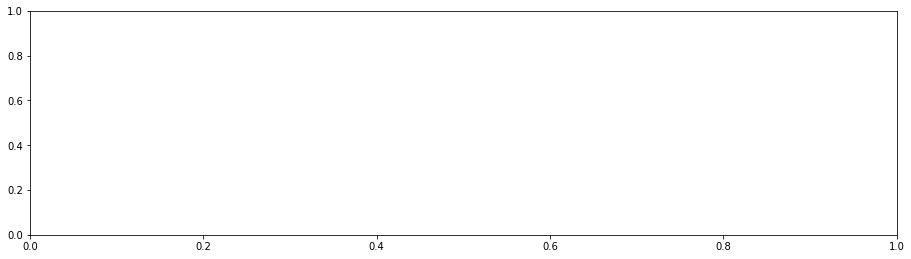

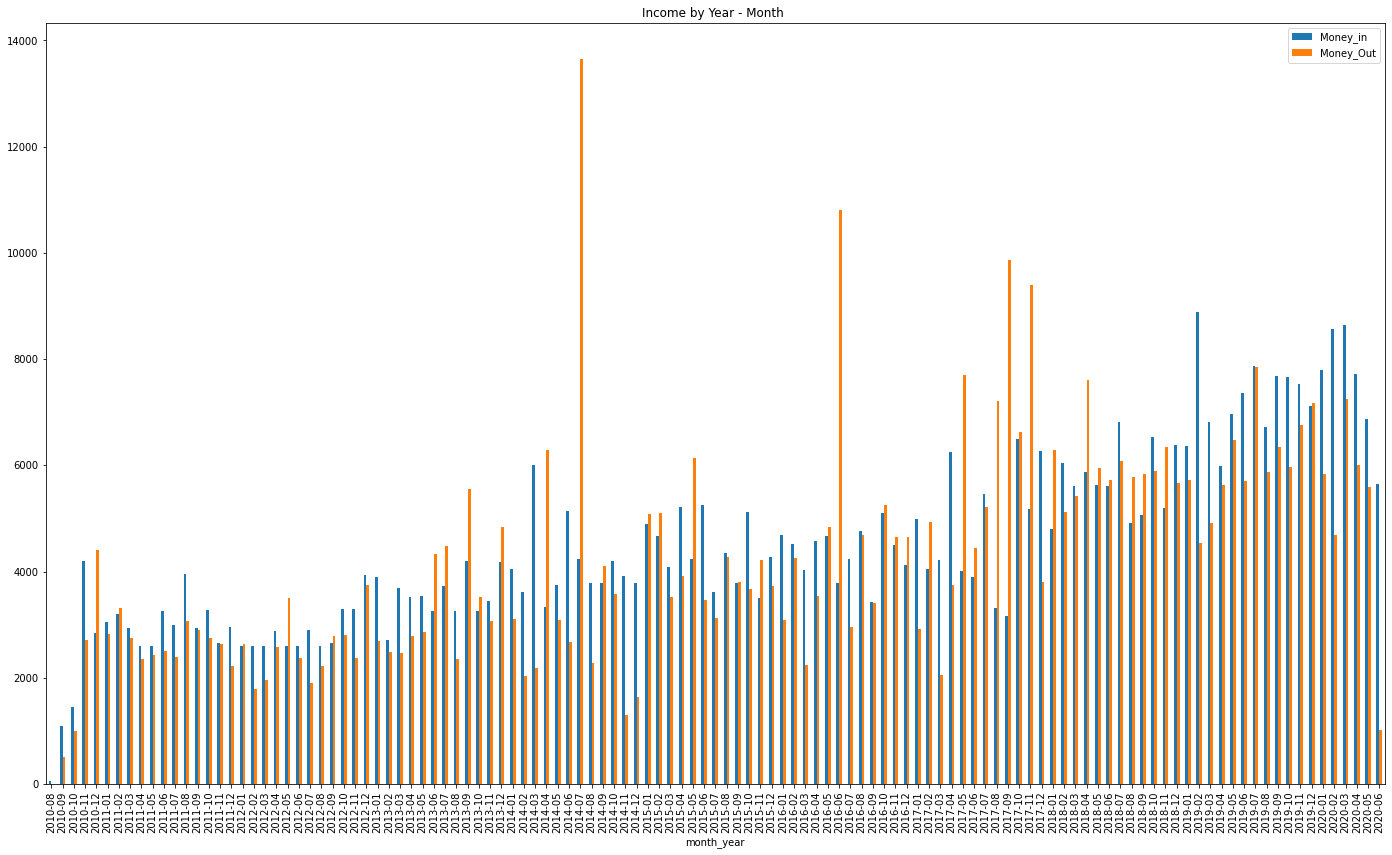

In [15]:
# Plot with various data
plt.figure()

plt.subplot(myspec[:1, :2])
ax = plt.gca()
plt.yscale('linear')
ax.xaxis.set_label_text('')
ax.xaxis.label.set_visible(False)

#data_grouped = data.groupby('month_year')['Money_in'].sum()
data_grouped = data.groupby('month_year').agg({'Money_in':'sum','Money_Out':'sum'}).reset_index()
data_grouped.plot.bar(x='month_year')
#data_grouped.plot.bar(x='month_year', y='Money_in',
#                   color='blue',  ax=ax, label='Income')
                  

plt.title('Income by Year - Month ')